In [2]:
import constants as c
import tester as t

b_results = t.run(c.BB, c.ZKW_FILE_PREFIX)
d_results = t.run(c.DYNAMIC, c.ZKW_FILE_PREFIX)
g_results = t.run(c.GREEDY, c.ZKW_FILE_PREFIX)
r_results = t.run(c.REDUX, c.ZKW_FILE_PREFIX)

[N=4] TIME: 18.25840 ms, AVG_TIME: 0.01914 ms, MAX_TIME: 0.22640 ms, ERRORS: 0/954, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=10] TIME: 20.24360 ms, AVG_TIME: 0.06839 ms, MAX_TIME: 0.71370 ms, ERRORS: 0/296, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=15] TIME: 45.38380 ms, AVG_TIME: 0.29470 ms, MAX_TIME: 10.62430 ms, ERRORS: 0/154, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=20] TIME: 41.04140 ms, AVG_TIME: 0.53301 ms, MAX_TIME: 7.10240 ms, ERRORS: 0/77, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=22] TIME: 99.40720 ms, AVG_TIME: 1.25832 ms, MAX_TIME: 45.09880 ms, ERRORS: 0/79, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=25] TIME: 772.67020 ms, AVG_TIME: 13.32190 ms, MAX_TIME: 616.04530 ms, ERRORS: 0/58, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=27] TIME: 53.74850 ms, AVG_TIME: 1.14359 ms, MAX_TIME: 33.93940 ms, ERRORS: 0/47, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=30] TIME: 150.18150 ms, AVG_TIME: 3.66296 ms, MAX_TIME: 91.50490 ms, ERRORS: 0/41, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=32

In [3]:
b_avg_t, d_avg_t, g_avg_t, r_avg_t = [], [], [], []

for b_result in b_results:
  b_avg_t.append(float(b_result[2]))

for d_result in d_results:
  d_avg_t.append(float(d_result[2]))

for g_result in g_results:
  g_avg_t.append(float(g_result[2]))

for r_result in r_results:
  r_avg_t.append(float(r_result[2]))

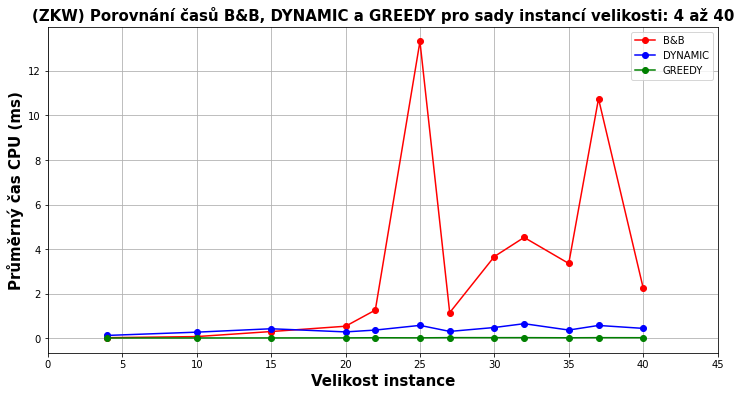

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

plt.title("(ZKW) Porovnání časů B&B, DYNAMIC a GREEDY pro sady instancí velikosti: 4 až 40", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrný čas CPU (ms)", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS, b_avg_t, marker = "o", linestyle = "solid", color = "red", label = "B&B")
plt.plot(c.NUM_OF_THINGS, d_avg_t, marker = "o", linestyle = "solid", color = "blue", label = "DYNAMIC")
plt.plot(c.NUM_OF_THINGS, g_avg_t, marker = "o", linestyle = "solid", color = "green", label = "GREEDY")

plt.grid()
plt.legend()
plt.show()

In [5]:
import pandas as pd

df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS,
  "Průměrný čas CPU pro B&B (ms)": b_avg_t,
  "Průměrný čas CPU pro DYNAMIC (ms)": d_avg_t,
  "Průměrný čas CPU pro GREEDY (ms)": g_avg_t
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrný čas CPU pro B&B (ms),Průměrný čas CPU pro DYNAMIC (ms),Průměrný čas CPU pro GREEDY (ms)
4,0.019140,0.120790,0.005770
10,0.068390,0.267030,0.006860
15,0.294700,0.419820,0.008790
20,0.533010,0.278360,0.011070
22,1.258320,0.360740,0.017610
25,13.321900,0.571270,0.012320
27,1.143590,0.300360,0.021790
30,3.662960,0.476000,0.020640
32,4.521720,0.647190,0.021340
35,3.352260,0.361590,0.014990


In [6]:
g_avg_e, r_avg_e, g_max_e, r_max_e = [], [], [], []

for g_result in g_results:
  g_avg_e.append(float(g_result[5]))
  g_max_e.append(float(g_result[6]))

for r_result in r_results:
  r_avg_e.append(float(r_result[5]))
  r_max_e.append(float(r_result[6]))

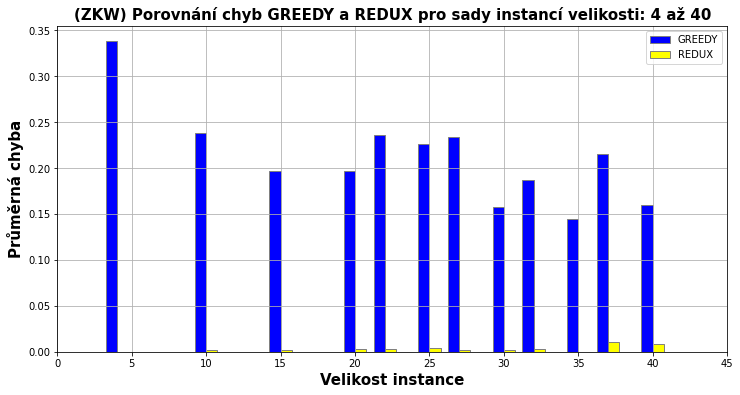

In [7]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

barWidth = 0.75
x1 = [x - barWidth / 2 for x in c.NUM_OF_THINGS]
x2 = [x + barWidth for x in x1]

plt.title("(ZKW) Porovnání chyb GREEDY a REDUX pro sady instancí velikosti: 4 až 40", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrná chyba", fontweight = "bold", fontsize = 15)

plt.bar(x1, g_avg_e, width = barWidth, color = "blue", edgecolor = "grey", label = "GREEDY")
plt.bar(x2, r_avg_e, width = barWidth, color = "yellow", edgecolor = "grey", label = "REDUX")

plt.grid()
plt.legend()
plt.show()

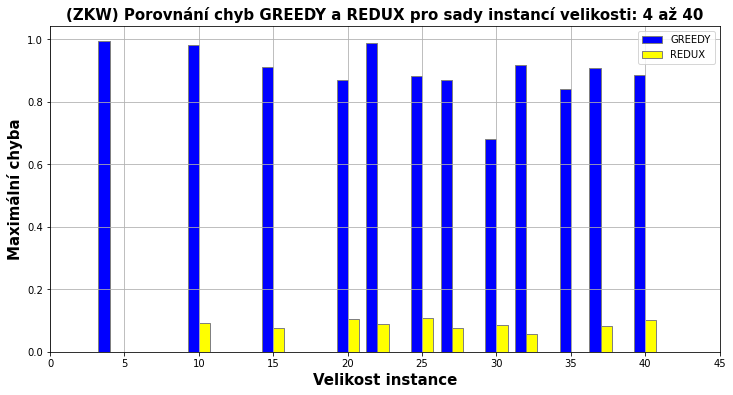

In [8]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

barWidth = 0.75
x1 = [x - barWidth / 2 for x in c.NUM_OF_THINGS]
x2 = [x + barWidth for x in x1]

plt.title("(ZKW) Porovnání chyb GREEDY a REDUX pro sady instancí velikosti: 4 až 40", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Maximální chyba", fontweight = "bold", fontsize = 15)

plt.bar(x1, g_max_e, width = barWidth, color = "blue", edgecolor = "grey", label = "GREEDY")
plt.bar(x2, r_max_e, width = barWidth, color = "yellow", edgecolor = "grey", label = "REDUX")

plt.grid()
plt.legend()
plt.show()

In [9]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS,
  "Průměrná chyba pro GREEDY": g_avg_e,
  "Průměrná chyba pro REDUX": r_avg_e,
  "Maximální chyba pro GREEDY": g_max_e,
  "Maximální chyba pro REDUX": r_max_e
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrná chyba pro GREEDY,Průměrná chyba pro REDUX,Maximální chyba pro GREEDY,Maximální chyba pro REDUX
4,0.337980,0.000000,0.994220,0.000000
10,0.237760,0.001520,0.980900,0.093030
15,0.196910,0.001530,0.911900,0.075150
20,0.196410,0.002660,0.870700,0.104550
22,0.235620,0.002600,0.986860,0.088310
25,0.225690,0.004460,0.882410,0.108310
27,0.233760,0.001650,0.869570,0.077640
30,0.157880,0.002100,0.682060,0.085900
32,0.186550,0.002510,0.916670,0.057580
35,0.144780,0.000000,0.839990,0.000000


In [10]:
f1_results = t.run(c.FPTAS, c.ZKW_FILE_PREFIX, 40, 0.1)
f5_results = t.run(c.FPTAS, c.ZKW_FILE_PREFIX, 40, 0.5)
f9_results = t.run(c.FPTAS, c.ZKW_FILE_PREFIX, 40, 0.9)

[N=4] TIME: 300.28290 ms, AVG_TIME: 0.31476 ms, MAX_TIME: 1.98440 ms, ERRORS: 11/954, AVG_ERROR: 0.00014, MAX_ERROR: 0.02143
[N=10] TIME: 736.65660 ms, AVG_TIME: 2.48870 ms, MAX_TIME: 13.53200 ms, ERRORS: 7/296, AVG_ERROR: 0.00014, MAX_ERROR: 0.01622
[N=15] TIME: 1271.93290 ms, AVG_TIME: 8.25930 ms, MAX_TIME: 76.10160 ms, ERRORS: 4/154, AVG_ERROR: 0.00010, MAX_ERROR: 0.00978
[N=20] TIME: 1445.81680 ms, AVG_TIME: 18.77684 ms, MAX_TIME: 41.73100 ms, ERRORS: 0/77, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=22] TIME: 1938.08640 ms, AVG_TIME: 24.53274 ms, MAX_TIME: 141.42150 ms, ERRORS: 2/79, AVG_ERROR: 0.00005, MAX_ERROR: 0.00327
[N=25] TIME: 2034.49380 ms, AVG_TIME: 35.07748 ms, MAX_TIME: 125.83120 ms, ERRORS: 1/58, AVG_ERROR: 0.00000, MAX_ERROR: 0.00009
[N=27] TIME: 2223.05710 ms, AVG_TIME: 47.29909 ms, MAX_TIME: 97.67910 ms, ERRORS: 0/47, AVG_ERROR: 0.00000, MAX_ERROR: 0.00000
[N=30] TIME: 2590.19040 ms, AVG_TIME: 63.17538 ms, MAX_TIME: 171.09580 ms, ERRORS: 0/41, AVG_ERROR: 0.00000, MAX

In [11]:
f1_avg_t, f1_max_e, f5_avg_t, f5_max_e, f9_avg_t, f9_max_e = [], [], [], [], [], []

for f1_result in f1_results:
  f1_avg_t.append(float(f1_result[2]))
  f1_max_e.append(float(f1_result[6]))

for f5_result in f5_results:
  f5_avg_t.append(float(f5_result[2]))
  f5_max_e.append(float(f5_result[6]))

for f9_result in f9_results:
  f9_avg_t.append(float(f9_result[2]))
  f9_max_e.append(float(f9_result[6]))

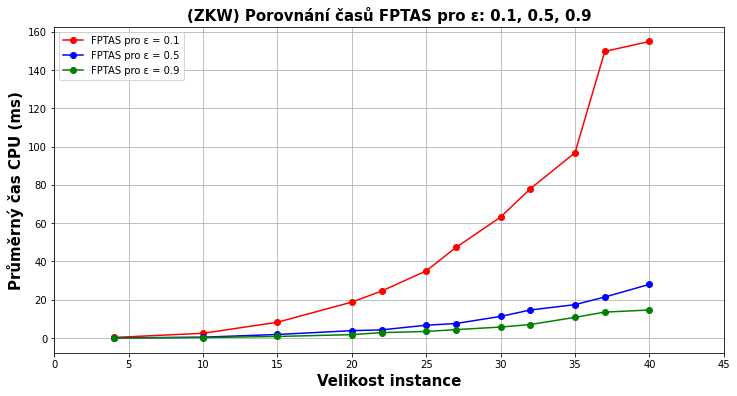

In [12]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

plt.title("(ZKW) Porovnání časů FPTAS pro ε: 0.1, 0.5, 0.9", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Průměrný čas CPU (ms)", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS, f1_avg_t, marker = "o", linestyle = "solid", color = "red", label = "FPTAS pro ε = 0.1")
plt.plot(c.NUM_OF_THINGS, f5_avg_t, marker = "o", linestyle = "solid", color = "blue", label = "FPTAS pro ε = 0.5")
plt.plot(c.NUM_OF_THINGS, f9_avg_t, marker = "o", linestyle = "solid", color = "green", label = "FPTAS pro ε = 0.9")

plt.grid()
plt.legend()
plt.show()

In [13]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS,
  "Průměrný čas CPU pro FPTAS s ε = 0.1 (ms)": f1_avg_t,
  "Průměrný čas CPU pro FPTAS s ε = 0.5 (ms)": f5_avg_t,
  "Průměrný čas CPU pro FPTAS s ε = 0.9 (ms)": f9_avg_t
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Průměrný čas CPU pro FPTAS s ε = 0.1 (ms),Průměrný čas CPU pro FPTAS s ε = 0.5 (ms),Průměrný čas CPU pro FPTAS s ε = 0.9 (ms)
4,0.314760,0.067340,0.045450
10,2.488700,0.458850,0.266550
15,8.259300,1.859950,0.826020
20,18.776840,3.869610,1.784300
22,24.532740,4.280140,2.836000
25,35.077480,6.701740,3.450420
27,47.299090,7.591070,4.400260
30,63.175380,11.306240,5.757630
32,77.979980,14.652250,7.058650
35,96.791670,17.456550,10.825380


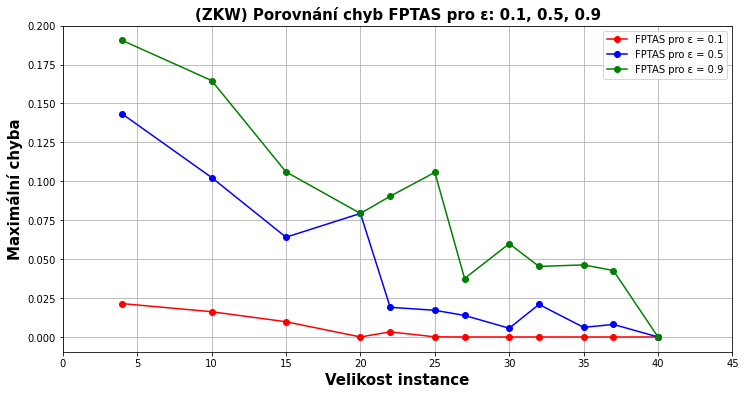

In [14]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.set_xlim(0, 45)

plt.title("(ZKW) Porovnání chyb FPTAS pro ε: 0.1, 0.5, 0.9", fontweight = "bold", fontsize = 15)
plt.xlabel("Velikost instance", fontweight = "bold", fontsize = 15)
plt.ylabel("Maximální chyba", fontweight = "bold", fontsize = 15)

plt.plot(c.NUM_OF_THINGS, f1_max_e, marker = "o", linestyle = "solid", color = "red", label = "FPTAS pro ε = 0.1")
plt.plot(c.NUM_OF_THINGS, f5_max_e, marker = "o", linestyle = "solid", color = "blue", label = "FPTAS pro ε = 0.5")
plt.plot(c.NUM_OF_THINGS, f9_max_e, marker = "o", linestyle = "solid", color = "green", label = "FPTAS pro ε = 0.9")

plt.grid()
plt.legend()
plt.show()

In [15]:
df = pd.DataFrame({
  "Velikost instance": c.NUM_OF_THINGS,
  "Maximální chyba pro FPTAS s ε = 0.1": f1_max_e,
  "Maximální chyba pro FPTAS s ε = 0.5": f5_max_e,
  "Maximální chyba pro FPTAS s ε = 0.9": f9_max_e
})

df.style.set_table_styles([{
  "selector": "th, td",
  "props": [
    ("background-color", "white"),
    ("color", "black"),
    ("outline", "1px solid black"),
    ("font-size", "20px"),
    ("text-align", "center")
  ]
}]).hide_index()

Velikost instance,Maximální chyba pro FPTAS s ε = 0.1,Maximální chyba pro FPTAS s ε = 0.5,Maximální chyba pro FPTAS s ε = 0.9
4,0.021430,0.143220,0.190480
10,0.016220,0.102440,0.164730
15,0.009780,0.064090,0.106040
20,0.000000,0.079370,0.079370
22,0.003270,0.019070,0.090400
25,0.000090,0.017140,0.105730
27,0.000000,0.013830,0.037560
30,0.000000,0.005610,0.059920
32,0.000000,0.020920,0.045320
35,0.000000,0.006170,0.046310
